In [ ]:
import sys
import pandas as pd
from pathlib import Path

from src.normalisers import NormaliseListings

In [ ]:
repo_root = Path.cwd().parents[1]
if str(repo_root) not in sys.path:
    sys.path.insert(0, str(repo_root))

from src.normalisers import NormaliseListings

In [ ]:
data_path = repo_root/'data'/'raw'
listings = pd.read_csv(data_path/'listings.csv.gz')

In [3]:
# Normalise Listings
listings_norm = NormaliseListings(listings)

In [4]:
unique_hosts = listings_norm.normalise_hosts()
unique_neighbourhoods = listings_norm.normalise_neighbourhoods()
unique_neighbourhood_overviews = listings_norm.normalise_neighbourhood_overview()

In [5]:
unique_hosts.head()

,host_id,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,59072,Dirk,2009-12-01,"Cape Town, South Africa",Proud to live in the beautiful city of Cape To...,within a few hours,100.0,88.0,False,7.0,19.0,"['email', 'phone', 'work_email']",True,True,1,1,0,0
1,59318,Linda,2009-12-02,<NA>,<NA>,a few days or more,0.0,33.0,False,7.0,20.0,"['email', 'phone']",True,True,5,5,0,0
2,59342,Georg,2009-12-02,Gibraltar,challenge us please! we love to perform!,within a few hours,100.0,80.0,False,7.0,7.0,"['email', 'phone']",True,True,6,1,5,0
3,59694,Alexa,2009-12-03,"Cape Town, South Africa",Professional businesswoman dedicated to provid...,<NA>,<NA>,<NA>,False,2.0,2.0,"['email', 'phone']",True,True,1,1,0,0
4,60196,Ian,2009-12-05,"Cape Town, South Africa",<NA>,<NA>,<NA>,<NA>,False,1.0,2.0,"['email', 'phone']",True,False,1,1,0,0


In [6]:
unique_hosts.isna().sum() / len(unique_hosts)

host_id                                         0.000000
host_name                                       0.000283
host_since                                      0.000283
host_location                                   0.281732
host_about                                      0.580869
host_response_time                              0.338970
host_response_rate                              0.338970
host_acceptance_rate                            0.220744
host_is_superhost                               0.000000
host_listings_count                             0.000283
host_total_listings_count                       0.000283
host_verifications                              0.000283
host_has_profile_pic                            0.000000
host_identity_verified                          0.000000
calculated_host_listings_count                  0.000000
calculated_host_listings_count_entire_homes     0.000000
calculated_host_listings_count_private_rooms    0.000000
calculated_host_listings_count_

In [7]:
if 'host_name' in unique_hosts.columns:
    unique_hosts.drop(columns=['host_name', 'host_location', 'host_verifications'], inplace=True)
for col in unique_hosts.columns:
    if unique_hosts[col].isna().sum() / len(unique_hosts) > 0.5:
        unique_hosts.drop(columns=[col], inplace=True)  
    unique_hosts.dropna(axis=0, inplace=True)
    unique_hosts['host_since'] = pd.to_datetime(unique_hosts['host_since'])

In [8]:
unique_hosts.isna().sum() / len(unique_hosts)

host_id                                         0.0
host_since                                      0.0
host_about                                      0.0
host_response_time                              0.0
host_response_rate                              0.0
host_acceptance_rate                            0.0
host_is_superhost                               0.0
host_listings_count                             0.0
host_total_listings_count                       0.0
host_has_profile_pic                            0.0
host_identity_verified                          0.0
calculated_host_listings_count                  0.0
calculated_host_listings_count_entire_homes     0.0
calculated_host_listings_count_private_rooms    0.0
calculated_host_listings_count_shared_rooms     0.0
dtype: float64

In [9]:
unique_hosts.describe()

,host_since,host_response_rate,host_acceptance_rate
count,4195,4195.0,4195.0
mean,2016-11-05 20:53:15.804529152,94.377116,82.437664
min,2009-07-31 00:00:00,0.0,0.0
25%,2014-11-06 00:00:00,100.0,77.0
50%,2016-02-21 00:00:00,100.0,93.0
75%,2018-03-30 00:00:00,100.0,100.0
max,2025-08-19 00:00:00,100.0,100.0
std,NaN,18.053498,25.336018


In [10]:
unique_hosts.head()

,host_id,host_since,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,59072,2009-12-01,Proud to live in the beautiful city of Cape To...,within a few hours,100.0,88.0,False,7.0,19.0,True,True,1,1,0,0
2,59342,2009-12-02,challenge us please! we love to perform!,within a few hours,100.0,80.0,False,7.0,7.0,True,True,6,1,5,0
5,60443,2009-12-06,Like to be as accommodating and informative a...,a few days or more,0.0,0.0,False,2.0,2.0,True,True,1,1,0,0
7,63255,2009-12-15,Own Self Catering cottages in Cape Town,within an hour,100.0,83.0,True,3.0,3.0,True,True,3,2,1,0
9,73439,2010-01-25,We live in a beautiful leafy suburb of Cape To...,within a few hours,100.0,84.0,True,5.0,5.0,True,True,5,5,0,0


In [11]:
unique_hosts.dtypes


host_id                                         string[python]
host_since                                      datetime64[ns]
host_about                                      string[python]
host_response_time                              string[python]
host_response_rate                                     Float64
host_acceptance_rate                                   Float64
host_is_superhost                               string[python]
host_listings_count                             string[python]
host_total_listings_count                       string[python]
host_has_profile_pic                            string[python]
host_identity_verified                          string[python]
calculated_host_listings_count                  string[python]
calculated_host_listings_count_entire_homes     string[python]
calculated_host_listings_count_private_rooms    string[python]
calculated_host_listings_count_shared_rooms     string[python]
dtype: object

## Hypothesis Testing

Do superhosts have have a higher acceptance rate? 

$H_{o}$: Superhosts do not have higher than acceptance rate.  
$H_{0}$ $\mu_{superhost}$ = $\mu_{normal}$  
$H_{0}$ $\mu_{superhost}$ - $\mu_{normal}$ = 0

$H_{A}$: Superhosts do have higher than average response rates.  
$H_{0}$ $\mu_{superhost}$ > $\mu_{normal}$  
$H_{0}$ $\mu_{superhost}$ - $\mu_{normal}$ > 0

In [12]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import t

In [13]:
xbar = unique_hosts.groupby('host_is_superhost')['host_acceptance_rate'].mean()
stdv = unique_hosts.groupby('host_is_superhost')['host_acceptance_rate'].std()
num = unique_hosts.groupby('host_is_superhost')['host_acceptance_rate'].count()

In [14]:
xbar

host_is_superhost
False    75.014236
True     91.605221
Name: host_acceptance_rate, dtype: Float64

In [15]:
stdv

host_is_superhost
False    30.581267
True     11.306131
Name: host_acceptance_rate, dtype: Float64

In [16]:
xbar_normal, xbar_superhost = xbar.values
print('normal', xbar_normal)
print('superhost', xbar_superhost)

normal 75.01423641069889
superhost 91.605221097496


In [17]:
stdv_normal, stdv_superhost = stdv.values
print('normal', stdv_normal)
print('superhost', stdv_superhost)

normal 30.58126660482092
superhost 11.306131439182288


In [18]:
num_normal, num_superhost = num.values
print('normal', num_normal)
print('superhost', num_superhost)

normal 2318
superhost 1877


In [19]:
mean_diff = xbar_superhost - xbar_normal
se_diff = np.sqrt(stdv_superhost ** 2 / num_superhost + stdv_normal ** 2 / num_normal)
t_stat = mean_diff / se_diff
t_stat

np.float64(24.160379561541752)

In [20]:
ddof = num_superhost + num_normal - 2
p_val = 1 - t.cdf(t_stat, df=ddof)
p_val

np.float64(0.0)

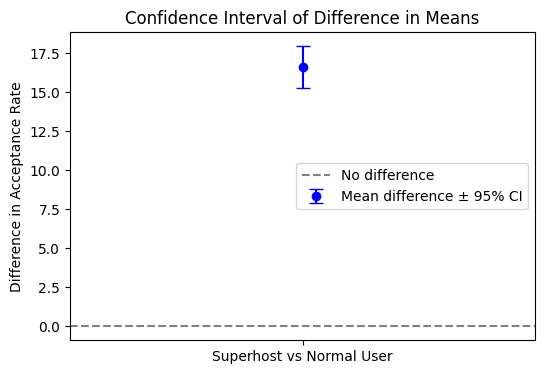

In [21]:
# Confidence level (95%)
alpha = 0.05
t_crit = t.ppf(1 - alpha/2, df=ddof)

# Confidence interval bounds
ci_lower = mean_diff - t_crit * se_diff
ci_upper = mean_diff + t_crit * se_diff

# Plotting
plt.figure(figsize=(6,4))
plt.axhline(0, color='gray', linestyle='--', label='No difference')
plt.errorbar(1, mean_diff, yerr=t_crit*se_diff, fmt='o', color='blue', capsize=5, label='Mean difference ± 95% CI')
plt.xticks([1], ['Superhost vs Normal User'])
plt.ylabel('Difference in Acceptance Rate')
plt.title('Confidence Interval of Difference in Means')
plt.legend()
plt.show()


In [22]:
# Calculate mean rating by class
mean_ratings = unique_hosts.groupby('host_is_superhost')['host_acceptance_rate'].mean()

# Identify which class has a higher mean rating
higher_class = mean_ratings.idxmax()
higher_mean = mean_ratings.max()

print("Class with higher average acceptance rate:", higher_class)
print("Mean acceptance rate of this class:", higher_mean)

Class with higher average acceptance rate: True
Mean acceptance rate of this class: 91.605221097496


### Hypothesis Test Conclusion

There is a statistically significant difference in review scores between instant bookable and non-instant bookable listings, with the confidence interval visualization reinforcing this result clearly.

## Logistic Regression

### Predict Superhost Status.

The goal of this project is to develop a predictive model to identify which Airbnb hosts are likely to achieve Superhost status based on various host-related features such as response time, acceptance rate, verification methods, and listing counts. By understanding the key factors that influence Superhost designation, we aim to support targeted interventions to enhance host performance and improve guest satisfaction.

A Superhost on Airbnb is a top-performing host recognized for consistently providing exceptional hospitality, a status indicated by a badge on their listing and profile. To achieve this status, hosts must meet specific performance criteria, such as a high rating, low cancellation rate, high response rate, and a minimum number of bookings, which are evaluated automatically by Airbnb

In [23]:
unique_hosts.head()

,host_id,host_since,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,59072,2009-12-01,Proud to live in the beautiful city of Cape To...,within a few hours,100.0,88.0,False,7.0,19.0,True,True,1,1,0,0
2,59342,2009-12-02,challenge us please! we love to perform!,within a few hours,100.0,80.0,False,7.0,7.0,True,True,6,1,5,0
5,60443,2009-12-06,Like to be as accommodating and informative a...,a few days or more,0.0,0.0,False,2.0,2.0,True,True,1,1,0,0
7,63255,2009-12-15,Own Self Catering cottages in Cape Town,within an hour,100.0,83.0,True,3.0,3.0,True,True,3,2,1,0
9,73439,2010-01-25,We live in a beautiful leafy suburb of Cape To...,within a few hours,100.0,84.0,True,5.0,5.0,True,True,5,5,0,0


In [24]:
response_time_classes = unique_hosts['host_response_time'].unique()
response_time_classes

<StringArray>
['within a few hours', 'a few days or more', 'within an hour', 'within a day']
Length: 4, dtype: string

In [25]:
unique_hosts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4195 entries, 0 to 26862
Data columns (total 15 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   host_id                                       4195 non-null   string        
 1   host_since                                    4195 non-null   datetime64[ns]
 2   host_about                                    4195 non-null   string        
 3   host_response_time                            4195 non-null   string        
 4   host_response_rate                            4195 non-null   Float64       
 5   host_acceptance_rate                          4195 non-null   Float64       
 6   host_is_superhost                             4195 non-null   string        
 7   host_listings_count                           4195 non-null   string        
 8   host_total_listings_count                     4195 non-null   string    

In [27]:
unique_hosts_exp = unique_hosts.copy()
unique_hosts_exp.columns = [col.replace('host_', '') for col in unique_hosts_exp.columns ]
unique_hosts_exp.dropna(axis=0, subset=['response_time', 'response_rate', 'acceptance_rate'], inplace=True)
unique_hosts_exp.info()


<class 'pandas.core.frame.DataFrame'>
Index: 4195 entries, 0 to 26862
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   id                                       4195 non-null   string        
 1   since                                    4195 non-null   datetime64[ns]
 2   about                                    4195 non-null   string        
 3   response_time                            4195 non-null   string        
 4   response_rate                            4195 non-null   Float64       
 5   acceptance_rate                          4195 non-null   Float64       
 6   is_superhost                             4195 non-null   string        
 7   listings_count                           4195 non-null   string        
 8   total_listings_count                     4195 non-null   string        
 9   has_profile_pic                          4195

In [28]:
response_time_classes = unique_hosts_exp['response_time'].unique()
response_time_classes

<StringArray>
['within a few hours', 'a few days or more', 'within an hour', 'within a day']
Length: 4, dtype: string

In [31]:
numeric_cols = [col for col in unique_hosts_exp.columns if unique_hosts_exp[col].dtype == 'int']
numeric_cols = numeric_cols[1:]
numeric_uniqe_hosts_exp = unique_hosts_exp[numeric_cols]
unique_hosts_exp_grp = unique_hosts_exp.drop(columns=['id']).groupby('is_superhost')
unique_hosts_exp_grp[numeric_cols].mean()

""
is_superhost
False
True


In [32]:
len(numeric_cols)

0

In [33]:
unique_hosts_exp_grp['response_time'].value_counts()

is_superhost  response_time     
False         within an hour        1209
              within a few hours     515
              within a day           463
              a few days or more     131
True          within an hour        1360
              within a few hours     388
              within a day           121
              a few days or more       8
Name: count, dtype: int64

In [34]:
unique_hosts_exp_grp['has_profile_pic'].value_counts()

is_superhost  has_profile_pic
False         True               2306
              False                12
True          True               1875
              False                 2
Name: count, dtype: int64

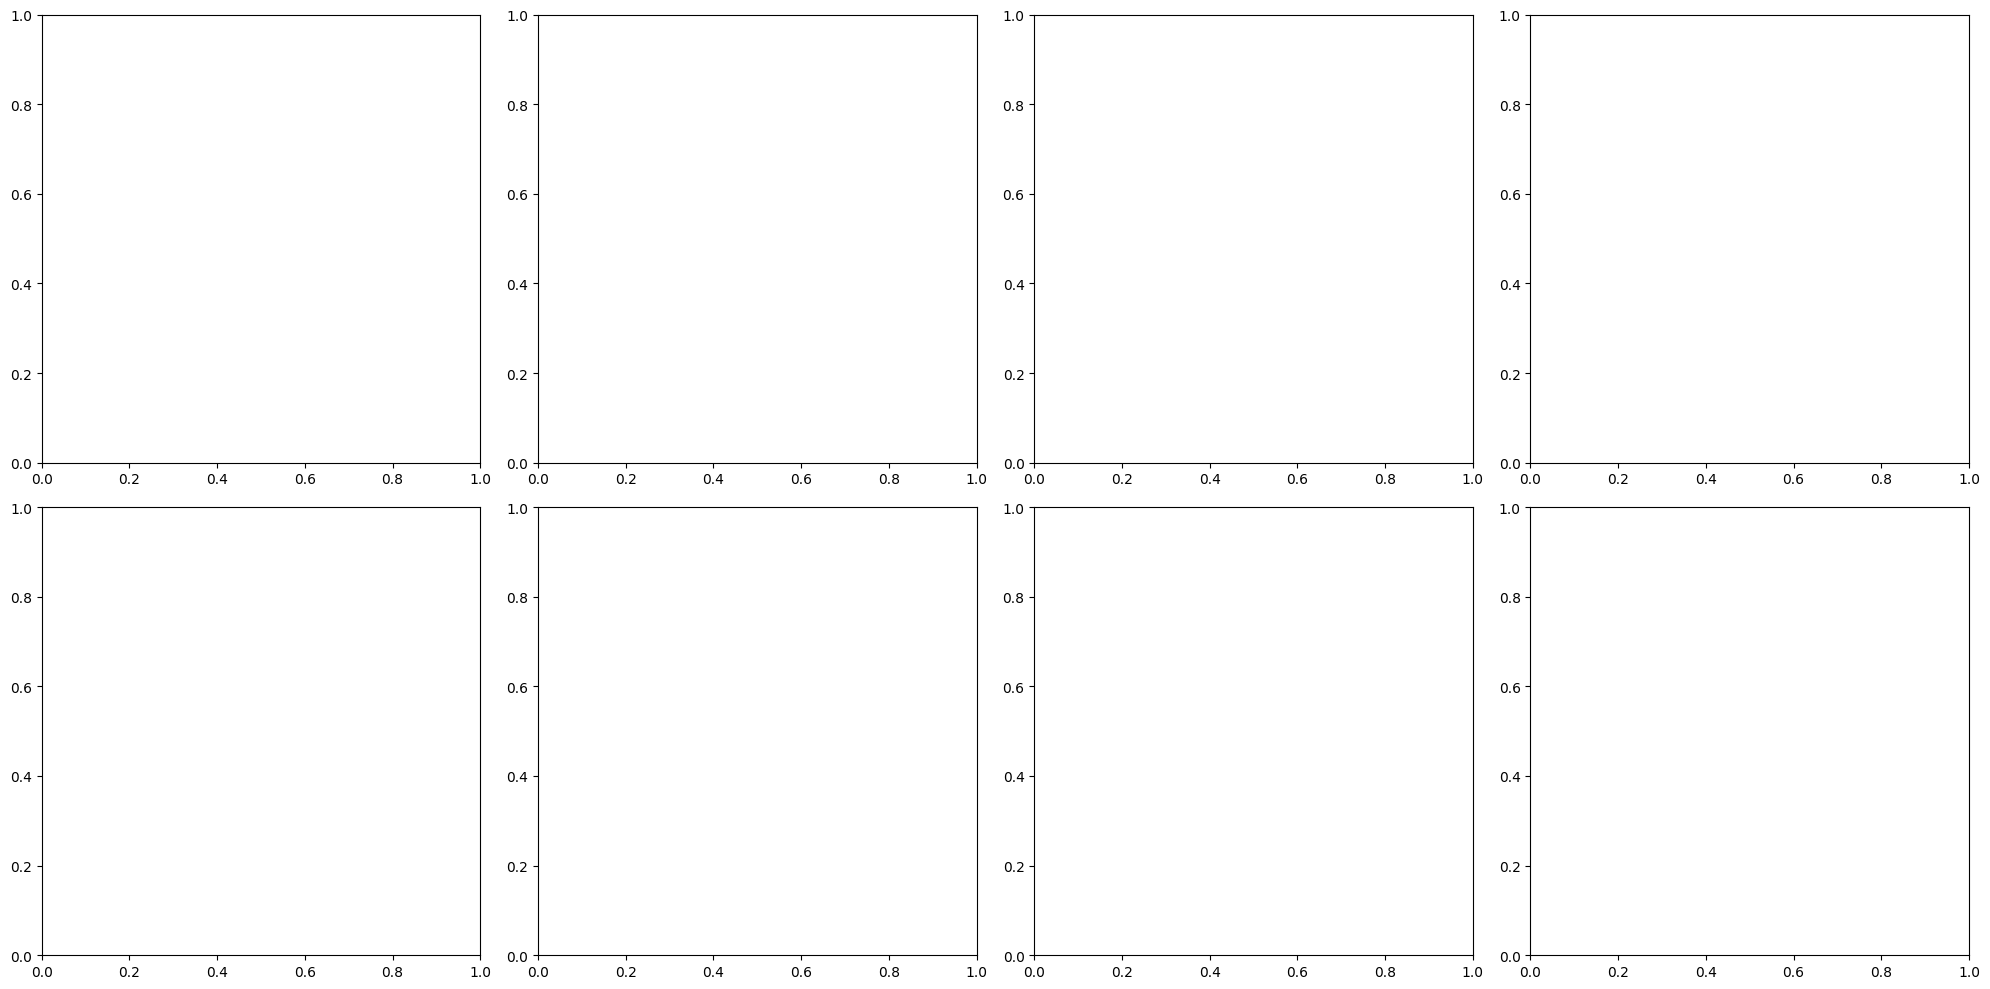

In [35]:
# Create a 2x4 subplot grid
fig, axes = plt.subplots(2, 4, figsize=(20, 10))  # Adjust size if needed

# Flatten axes array for easy iteration
axes = axes.flatten()

# Loop through columns and plot boxplots by 'host_is_superhost'
for i, col in enumerate(numeric_cols):
    sns.boxplot(x='is_superhost', y=col, data=unique_hosts_exp, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col} by Superhost')
    axes[i].set_xlabel('Superhost')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

## Assessing Correlations

`acceptance_rate` and `response_rate are moderately` correlated 0.51  
`total_listings_count` and `listings_count are higly` correlated 0.83  
`calculated_listings_count` and `calculated_listings_count_entire_homes` are very higly correlated 0.93 


In [36]:
num_corr = numeric_uniqe_hosts_exp.corr() 
plt.figure(figsize=(10, 8))
sns.heatmap(num_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()

ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 1000x800 with 0 Axes>

In [ ]:
# Define the order based on typical Airbnb response times
response_time_order = [
    'within an hour',
    'within a few hours',
    'within a day',
    'a few days or more'
]

# Convert to ordered categorical type
unique_hosts_exp['response_time'] = pd.Categorical(unique_hosts_exp['response_time'],
    categories=response_time_order,
    ordered=True
)

In [ ]:
# Create a summary dataframe with proportions of Superhosts per response time level
prop_df = unique_hosts_exp.groupby('response_time', observed=False)['is_superhost'].mean().reset_index()
fig, axes = plt.subplots(1, 1, figsize=(12, 5))

# Plot barplot
sns.barplot(x='response_time', y='is_superhost', data=prop_df)
plt.xlabel('Host Response Time')
plt.ylabel('Proportion of Superhosts')
plt.title('Proportion of Superhosts by Host Response Time')
plt.xticks(rotation=45)
plt.show()

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create contingency table of observed counts
contingency_table_time = pd.crosstab(unique_hosts_exp['response_time'], unique_hosts_exp['is_superhost'])
contingency_table_rate = pd.crosstab(unique_hosts_exp['response_rate'], unique_hosts_exp['is_superhost'])

# Perform chi-square test
cont_tables = [contingency_table_rate, contingency_table_time]

results = []
for tab in cont_tables:
    chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table_time)
    print("Chi-square statistic:", chi2_stat)
    print("Degrees of freedom:", dof)
    print("P-value:", p_val)

    # Interpret the p-value
    alpha = 0.05
    if p_val < alpha:
        print("Reject null hypothesis: Variables are dependent (significant association).")
    else:
        print("Fail to reject null hypothesis: No significant association between variables.")

    print()


In [ ]:
from scipy.stats import ttest_ind, mannwhitneyu, pointbiserialr

numeric_cols = [
    'response_rate', 'acceptance_rate', 'listings_count',
    'total_listings_count', 'calculated_listings_count',
    'calculated_listings_count_entire_homes', 'calculated_listings_count_private_rooms',
    'calculated_listings_count_shared_rooms'
]

# Convert target to integer for correlation
target = unique_hosts_exp['is_superhost'].astype(int)

for col in numeric_cols:
    group_true = unique_hosts_exp[unique_hosts_exp['is_superhost'] == True][col].dropna()
    group_false = unique_hosts_exp[unique_hosts_exp['is_superhost'] == False][col].dropna()

    # t-test
    t_stat, t_pval = ttest_ind(group_true, group_false, nan_policy='omit')

    # Mann-Whitney U test
    u_stat, u_pval = mannwhitneyu(group_true, group_false, alternative='two-sided')

    # Point-biserial correlation
    valid_idx = unique_hosts_exp[col].notnull()
    corr, corr_pval = pointbiserialr(target[valid_idx], unique_hosts_exp.loc[valid_idx, col])

    print(f"Variable: {col}")
    print(f"  t-test p-value: {t_pval:.4f}")
    print(f"  Mann-Whitney U test p-value: {u_pval:.4f}")
    print(f"  Point-biserial correlation: {corr:.4f} (p-value: {corr_pval:.4f})\n")
